In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

In [3]:
import os
extracted_noses_dir = "/content/drive/MyDrive/adv_ml_project_vt/extracted_noses_from_coco"

In [8]:
# extract eyes from extracted_face_image
def extract_nose_from_extratced_face(filename, index, required_size = (200,200)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    try:
        if len(results)>=1:
            #print(results[0])
            xnose= results[0]['keypoints']['nose'][0]-35
            ynose = results[0]['keypoints']['nose'][1]+15
            width = results[0]['keypoints']['nose'][0] +35
            height = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2)+10
            nose = pixels[height:ynose, xnose:width]
            # resize pixels to the model size
            image = Image.fromarray(nose)
            image = image.resize(required_size)
            nose_array = np.asarray(image)
            plt.imshow(nose_array)
            plt.imsave(os.path.join(extracted_noses_dir, 'coco_nose_img_{}.jpg'.format(index)),nose_array)
            return True
    except:
        None
    return False

In [4]:
#Getting xiaona's git because it contains the coco face images
!git clone https://github.com/XiaonaZhou/Text_to_Image_analysis.git

Cloning into 'Text_to_Image_analysis'...
remote: Enumerating objects: 102101, done.
remote: Counting objects: 100% (15115/15115), done.
remote: Compressing objects: 100% (14998/14998), done.
remote: Total 102101 (delta 116), reused 15115 (delta 116), pack-reused 86986
Receiving objects: 100% (102101/102101), 3.51 GiB | 32.84 MiB/s, done.
Resolving deltas: 100% (352/352), done.
Checking out files: 100% (36777/36777), done.


In [6]:
files = os.listdir('/content/Text_to_Image_analysis/extracted_faces_from_COCO')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 163ms/step
1347
1/1 [==============================] - 0s 137ms/step
1348
1/1 [==============================] - 0s 246ms/step
1349
1/1 [==============================] - 0s 266ms/step
1350
1/1 [==============================] - 0s 167ms/step
1351
1/1 [==============================] - 0s 223ms/step
1352
1/1 [==============================] - 0s 150ms/step
1353
1/1 [==============================] - 0s 150ms/step
1354
1/1 [==============================] - 0s 152ms/step
1355
1/1 [==============================] - 0s 151ms/step
1356
1/1 [==============================] - 0s 146ms/step
1357
1/1 [==============================] - 0s 180ms/step
1358
1/1 [==============================] - 0s 142ms/step
1359
1/1 [==============================] - 0s 196ms/step
1360
1/1 [==============================] - 0s 181ms/step
1361
1/1 [==============================] - 0s 189ms/step
1362
1/1 [================

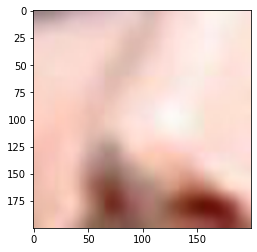

In [10]:
index =0
for file in files[0:2000]:
    if extract_nose_from_extratced_face(os.path.join('/content/Text_to_Image_analysis/extracted_faces_from_COCO',file), index = index):
        print(index)
        index+=1